In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs


In [50]:
sbs.set()

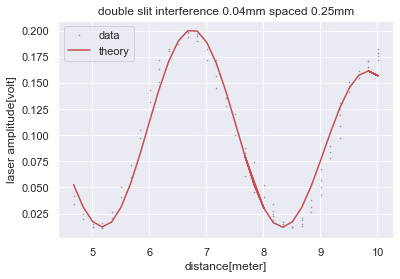

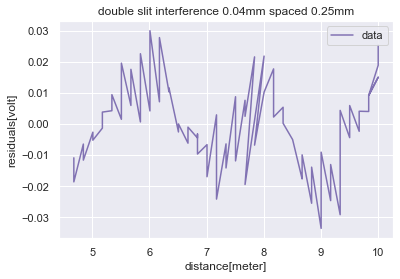

s:0.8490153788530036
a:1451.6345482469012
p1:0.14395256887704766
p2:5.623815573081914
offset:-24.659801138018903
R^2:0.9576602410762092


In [51]:
def newmodel(x,s,a ,*args):
    return es.model_integrate(x,es.double_slit_model,s,a,*args)

pname=['s' ,'a','p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
L=25.0e-5
A=50
offset = es.offset
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))
offset2=offset*(np.pi*L/(wl*z))

data=es.read('exp1125/original parameters/double slit/0.04w 0.25s slit not centered symmeyricly','sweep1.txt')
r,c=[50,2000]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s,a, p1, p2 , offset2],
                         bounds=((0,a-0.0000001*a,0      ,0     ,-np.inf),
                                 ( np.inf,a,np.inf,np.inf,np.inf)))
plt.plot(xdata2,es.model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
plt.plot(xdata2,ydata-es.model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))


